In [ ]:
!pip install torch torchaudio transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 881.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
!pip install datasets

  Using cached fsspec-2025.3.0-py3-none-any.whl.metadata (11 kB)
Using cached fsspec-2025.3.0-py3-none-any.whl (193 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


In [ ]:
!pip install torchviz

In [ ]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.3 MB/s eta 0:00:00


In [ ]:
!pip install torchsummary

In [ ]:
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 91.4 MB/s eta 0:00:00


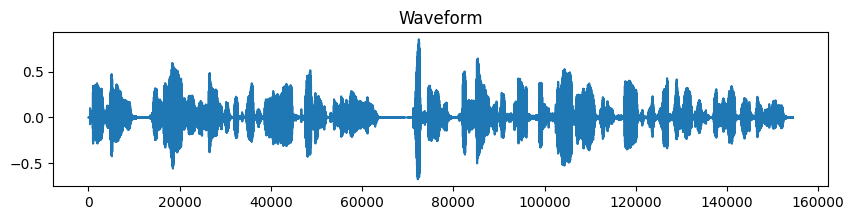

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Wav2Vec2ForCTC(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder)

/usr/local/lib/python3.11/dist-packages/transformers/models/wav2vec2/modeling_wav2vec2.py:870: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if attn_output.size() != (bsz, self.num_heads, tgt_len, self.head_dim):


ONNX model saved as 'wav2vec2.onnx' — load this in Netron (https://netron.app) to see full architecture.


In [ ]:
import torch
import torchaudio
import matplotlib.pyplot as plt
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
from torchviz import make_dot
from jiwer import wer
import os

# Step 1: Load and Resample Audio
audio_path = "/content/LJ001-0001.wav"
waveform, sample_rate = torchaudio.load(audio_path)

if sample_rate != 16000:
    resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)
    waveform = resampler(waveform)
    sample_rate = 16000

# Plot waveform
plt.figure(figsize=(10, 2))
plt.plot(waveform.t().numpy())
plt.title("Waveform")
plt.show()

# Step 2: Load Pretrained Model and Processor
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")
model.eval()
print(model)

# Step 3: Inference
inputs = processor(waveform.squeeze().numpy(), sampling_rate=sample_rate, return_tensors="pt", padding=True)
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

pred_ids = torch.argmax(logits, dim=-1)
transcription = processor.decode(pred_ids[0])
print("Transcription Output (Wav2Vec2 + CTC):")
print(transcription)

# Step 4: Word Error Rate (WER) Calculation
reference = "Printing in the only sense with which we are at present concerned differs from most if not from all the arts and crafts represented in the Exhibition"
hypothesis = transcription

error = wer(reference.lower(), hypothesis.lower())
print("Word Error Rate (WER)",error)

# Step 5: Visualize Computation Graph (limited to forward pass)
dot = make_dot(logits, params=dict(list(model.named_parameters())))
dot.format = 'png'
dot.render('wav2vec2_architecture')
print("\nComputation graph saved as 'wav2vec2_architecture.png'")

# Step 6: Export Full Model as ONNX for Netron visualization
onnx_path = "wav2vec2.onnx"
torch.onnx.export(model,
                  (inputs["input_values"],),
                  onnx_path,
                  input_names=["input_values"],
                  output_names=["logits"],
                  dynamic_axes={"input_values": {0: "batch_size", 1: "sequence"}},
                  opset_version=17)
print(f"ONNX model saved as '{onnx_path}' — load this in Netron (https://netron.app) to see full architecture.")


In [ ]:
from google.colab import files
files.download("wav2vec2.onnx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

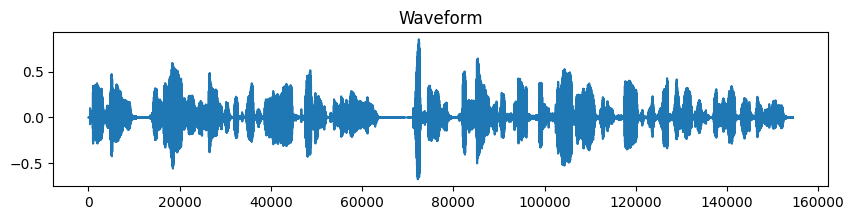

preprocessor_config.json:   0%|          | 0.00/254 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/257 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.24k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.37G [00:00<?, ?B/s]

Transcription Output (Wav2Vec2 + Conformer + CTC):
PRINTING IN THE ONLY SENSE WITH WHICH WE ARE AT PRESENT CONCERNED DIFFERS FROM MOST IF NOT FROM ALL THE ARTS AND CRAFTS REPRESENTED IN THE EXHIBITION
Word Error Rate (WER): 0.0
Computation graph saved as 'wav2vec2_conformer_architecture.png'


/usr/local/lib/python3.11/dist-packages/transformers/models/wav2vec2_conformer/modeling_wav2vec2_conformer.py:163: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if sequence_length == self.cached_sequence_length and self.cached_rotary_positional_embedding is not None:


ONNX model saved as 'wav2vec2_conformer.onnx' — open in https://netron.app to view full architecture.


In [ ]:
import torch
import torchaudio
import matplotlib.pyplot as plt
from transformers import Wav2Vec2Processor, Wav2Vec2ConformerForCTC
from torchviz import make_dot
from jiwer import wer

# Step 1: Load and Resample Audio
audio_path = "/content/LJ001-0001.wav"
waveform, sample_rate = torchaudio.load(audio_path)

if sample_rate != 16000:
    waveform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(waveform)
    sample_rate = 16000

# Plot waveform
plt.figure(figsize=(10, 2))
plt.plot(waveform.t().numpy())
plt.title("Waveform")
plt.show()

# Step 2: Load Conformer-based Wav2Vec2 model
model_name = "facebook/wav2vec2-conformer-rope-large-960h-ft"  # Correct model name
processor = Wav2Vec2Processor.from_pretrained(model_name)
model = Wav2Vec2ConformerForCTC.from_pretrained(model_name)
model.eval()

# Step 3: Inference
inputs = processor(waveform.squeeze().numpy(), sampling_rate=sample_rate, return_tensors="pt", padding=True)
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

pred_ids = torch.argmax(logits, dim=-1)
transcription = processor.decode(pred_ids[0])
print("Transcription Output (Wav2Vec2 + Conformer + CTC):")
print(transcription)

# Step 4: Word Error Rate (WER)
reference = "Printing in the only sense with which we are at present concerned differs from most if not from all the arts and crafts represented in the Exhibition"
error = wer(reference.lower(), transcription.lower())
print("Word Error Rate (WER):", error)

# Step 5: Visualize Computation Graph
dot = make_dot(logits, params=dict(list(model.named_parameters())))
dot.format = 'png'
dot.render('wav2vec2_conformer_architecture')
print("Computation graph saved as 'wav2vec2_conformer_architecture.png'")

# Step 6: Export to ONNX (check opset compatibility)
onnx_path = "wav2vec2_conformer.onnx"
torch.onnx.export(model,
                  (inputs["input_values"],),
                  onnx_path,
                  input_names=["input_values"],
                  output_names=["logits"],
                  dynamic_axes={"input_values": {0: "batch_size", 1: "sequence"}} if inputs["input_values"].shape[0] is None else {},
                  opset_version=17)
print(f"ONNX model saved as '{onnx_path}' — open in https://netron.app to view full architecture.")

In [ ]:
from google.colab import files
files.download("wav2vec2_conformer.onnx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(model)

Wav2Vec2ConformerForCTC(
  (wav2vec2_conformer): Wav2Vec2ConformerModel(
    (feature_extractor): Wav2Vec2ConformerFeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2ConformerLayerNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
        (1-4): 4 x Wav2Vec2ConformerLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2ConformerLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2ConformerFeatureProjection(
      (layer_n